<h1>Import frameworks</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

/var/folders/4w/fxlhfyw94_9b5msc4nfc233m0000gn/T/ipykernel_73213/986995184.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<h1>Import and preprocessing</h1>

In [3]:
seeds = pd.read_table('../seeds.tsv')
seeds.columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove', 'species']

X = seeds.drop(columns=['species'])  # Features
y = seeds['species']  

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

seeds_normalized = pd.DataFrame(X_normalized, columns=X.columns)
seeds_normalized['species'] = y
print(seeds_normalized.head())


       area  perimeter  compactness    length     width  asymmetry    groove  \
0  0.405099   0.446281     0.662432  0.368806  0.501069   0.032883  0.215165   
1  0.349386   0.347107     0.879310  0.220721  0.503920   0.251453  0.150665   
2  0.306893   0.316116     0.793103  0.239302  0.533856   0.194243  0.140817   
3  0.524079   0.533058     0.864791  0.427365  0.664291   0.076701  0.322994   
4  0.357885   0.371901     0.789474  0.274212  0.486101   0.220637  0.215165   

   species  
0        1  
1        1  
2        1  
3        1  
4        1  


<h1>Number of clusters</h1>

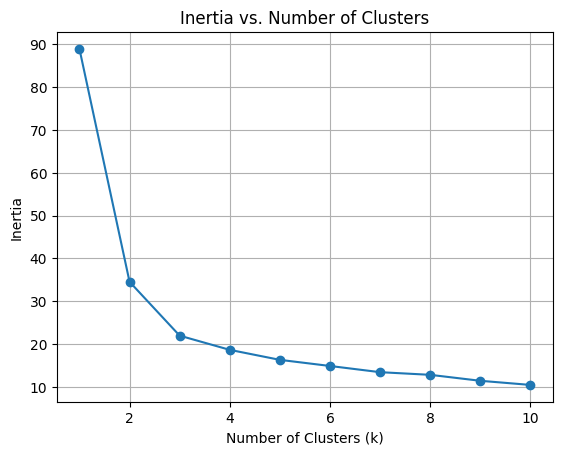

In [5]:
X = seeds_normalized.drop(columns=['species'])
# Initialize a list to store the inertia values
inertia_values = []

# Iterate over different values of k
for k in range(1, 11): 
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia_values.append(kmeans.inertia_)

# Plotting the inertia values against k
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.grid(True)
plt.show()